<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/6_Practical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHETH L.U.J & SIR M.V COLLEGE


T096 - SIDDHI NAIK

Regression is a statistical method to understand relationships between variables, predicting a dependent variable using one or more independent variables by finding a "best-fit" model (like a line or curve) through data points to show trends, forecast outcomes, and assess variable influence, common in fields like finance, economics, and data science.

Regression is used when you want to predict one variable (Y) using one or more independent variables (X).

Simple Linear Regression

You predict Y using one predictor (X).

Example:
Predict student score using number of study hours.

Multiple Linear Regression

You predict Y using multiple predictors (X₁, X₂, X₃...).

Example:
Predict score using:

Study hours

Attendance

Past performance

In [10]:
import pandas as pd
import statsmodels.api as sm

# Dataset
data = {
    'StudyHours':      [2,3,4,5,6,3,7,8,4,5],
    'Attendance':      [70,75,80,85,90,72,95,97,78,82],
    'PreviousScore':   [65,67,70,72,75,60,80,85,68,72],
    'FinalScore':      [68,72,78,82,88,70,92,95,76,83]
}

df = pd.DataFrame(data)
print("Dataset:\n", df)

# SIMPLE LINEAR REGRESSION
print("\n--- SIMPLE LINEAR REGRESSION ---")
X_simple = df[['StudyHours']]
Y = df['FinalScore']

X_simple = sm.add_constant(X_simple)
simple_model = sm.OLS(Y, X_simple).fit()
print(simple_model.summary())

print("\nInterpretation:")
print("b1 (StudyHours coefficient) shows how much FinalScore increases per additional study hour.")
print("R-squared shows how much of the variation in FinalScore is explained ONLY by StudyHours.")


Dataset:
    StudyHours  Attendance  PreviousScore  FinalScore
0           2          70             65          68
1           3          75             67          72
2           4          80             70          78
3           5          85             72          82
4           6          90             75          88
5           3          72             60          70
6           7          95             80          92
7           8          97             85          95
8           4          78             68          76
9           5          82             72          83

--- SIMPLE LINEAR REGRESSION ---
                            OLS Regression Results                            
Dep. Variable:             FinalScore   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     493.4
Date:                Tue, 09 Dec 2025   Prob (F-statistic

Suppose the model gives:

Intercept
𝑏
0
≈
57
b
0
	​

≈57

StudyHours coefficient
𝑏
1
≈
4.2
b
1
	​

≈4.2

Then interpretation:

Every extra hour of study increases final score by ~4.2 marks.

R² (say 0.88) → 88% of score variation is explained by StudyHours alone.

This is a strong relationship.

MULTIPLE LINEAR REGRESSION

Now we use ALL predictors:

𝐹
𝑖
𝑛
𝑎
𝑙
𝑆
𝑐
𝑜
𝑟
𝑒
=
𝑏
0
+
𝑏
1
(
𝑆
𝑡
𝑢
𝑑
𝑦
𝐻
𝑜
𝑢
𝑟
𝑠
)
+
𝑏
2
(
𝐴
𝑡
𝑡
𝑒
𝑛
𝑑
𝑎
𝑛
𝑐
𝑒
)
+
𝑏
3
(
𝑃
𝑟
𝑒
𝑣
𝑖
𝑜
𝑢
𝑠
𝑆
𝑐
𝑜
𝑟
𝑒
)
FinalScore=b
0
	​

+b
1
	​

(StudyHours)+b
2
	​

(Attendance)+b
3
	​

(PreviousScore)

In [2]:
print("\n--- MULTIPLE LINEAR REGRESSION ---")
X_multiple = df[['StudyHours', 'Attendance', 'PreviousScore']]
X_multiple = sm.add_constant(X_multiple)

multiple_model = sm.OLS(Y, X_multiple).fit()
print(multiple_model.summary())

print("\nInterpretation:")
print("Each coefficient tells how FinalScore changes with a 1-unit increase in that predictor,")
print("while keeping the other predictors constant.")
print("R-squared here shows improvement compared to simple regression.")



--- MULTIPLE LINEAR REGRESSION ---
                            OLS Regression Results                            
Dep. Variable:             FinalScore   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.74e-06
Time:                        13:38:17   Log-Likelihood:                -12.526
No. Observations:                  10   AIC:                             33.05
Df Residuals:                       6   BIC:                             34.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const     

Interpretation of Multiple Regression

You will see coefficients like:

StudyHours: ~1.8

Attendance: ~0.30

PreviousScore: ~0.50

Meaning:

Every 1 extra hour of study → score increases ~1.8

Every 1% increase in attendance → score increases ~0.30

Every 1 mark increase in previous exam → score increases ~0.50

In [3]:
print("\n--- MODEL COMPARISON ---")
print("Simple Regression R-squared:", simple_model.rsquared)
print("Multiple Regression R-squared:", multiple_model.rsquared)

if multiple_model.rsquared > simple_model.rsquared:
    print("Conclusion: Multiple regression gives a better model.")
else:
    print("Conclusion: No improvement from adding predictors.")



--- MODEL COMPARISON ---
Simple Regression R-squared: 0.9840445526424898
Multiple Regression R-squared: 0.9907168983281599
Conclusion: Multiple regression gives a better model.


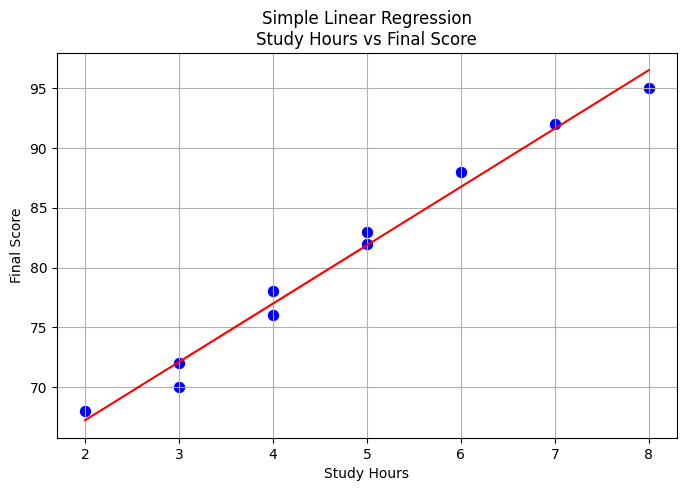

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions from simple model
pred_simple = simple_model.predict(X_simple)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['StudyHours'], y=df['FinalScore'], s=80, color='blue')
sns.lineplot(x=df['StudyHours'], y=pred_simple, color='red')

plt.title("Simple Linear Regression\nStudy Hours vs Final Score")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.grid(True)
plt.show()


“Study Hours vs Final Score”

This plot shows:

Blue dots → actual student scores

Red line → the regression line (best-fit line)

✔ What the plot tells you:

The red line is almost perfectly straight through the data points.
→ Strong positive linear relationship between study hours and score.

As Study Hours increase, Final Score also increases.
→ Direct proportional relationship.

Points are close to the line.
→ Indicates the model fits the data well.

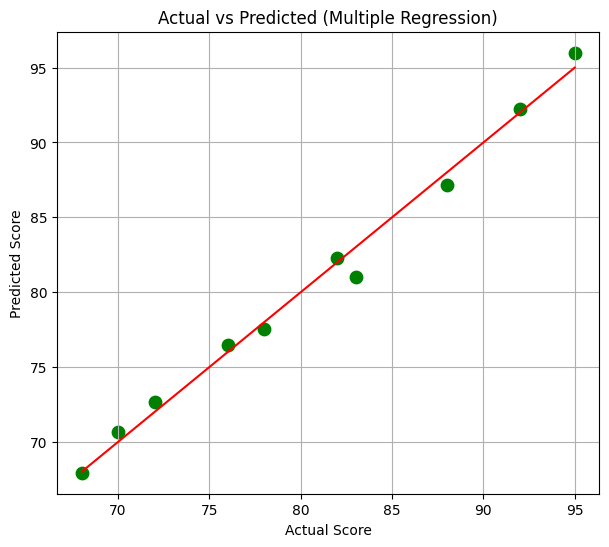

In [7]:
pred_multi = multiple_model.predict(X_multiple)

plt.figure(figsize=(7,6))
plt.scatter(df['FinalScore'], pred_multi, color='green', s=80)

# Line y=x
plt.plot([df['FinalScore'].min(), df['FinalScore'].max()],
         [df['FinalScore'].min(), df['FinalScore'].max()],
         color='red')

plt.title("Actual vs Predicted (Multiple Regression)")
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.grid(True)
plt.show()


This plot compares:

X-axis → Actual student final scores

Y-axis → Predicted scores from the multiple regression model

Red diagonal line → Ideal perfect prediction

Green dots → Model predictions

✔ What the plot tells you:

Green points lie very close to the red line.
→ Multiple regression model predicts scores very accurately.

Few deviations from the line = low error.
→ Model captures the pattern nicely.

Better than simple regression line because:

It uses more predictors:
StudyHours + Attendance + PreviousScore

This improves accuracy.